Лабораторная работа №1

In [1]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [457]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Загрузка данных

In [432]:
df = pd.read_csv('dataset.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


Подготовка данных

In [435]:
df = df.dropna()

In [434]:
# Sex

tempDelete = df[df['sex'] == '.'].index
df = df.drop(tempDelete, axis=0)

sex = set(df['sex'])



sexDict = {item:val for val, item in enumerate(sex)}

display(sexDict)

df['sex'] = df['sex'].map(lambda elem: sexDict[elem])

{'MALE': 0, 'FEMALE': 1}

<Axes: >

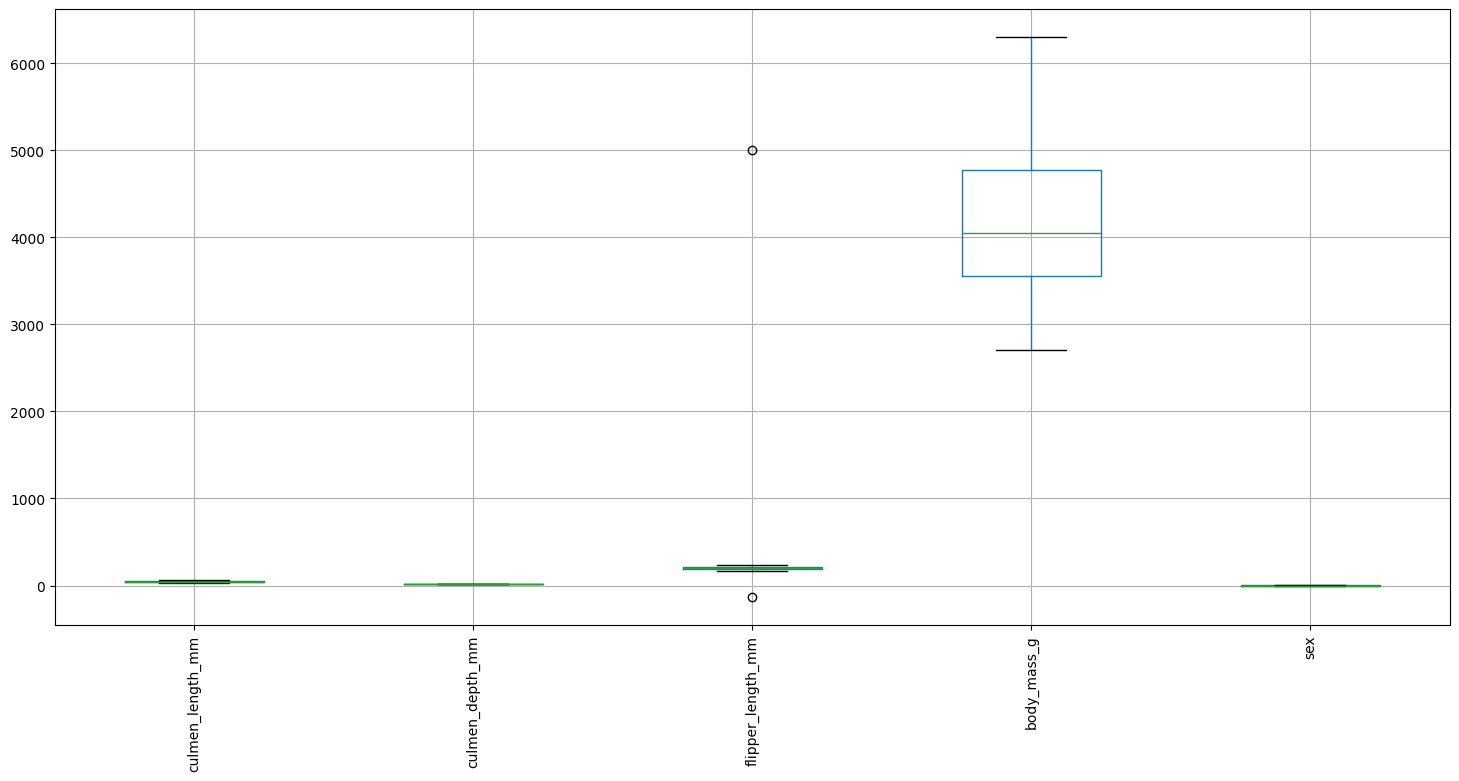

In [436]:
ax = df.boxplot(column=list(df.columns),figsize=(18,8))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax

count     334.000000
mean      214.347305
std       263.648447
min      -132.000000
25%       190.000000
50%       197.000000
75%       213.000000
max      5000.000000
Name: flipper_length_mm, dtype: float64

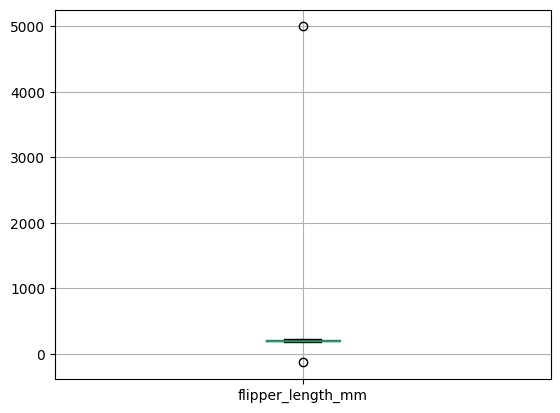

In [437]:
df.boxplot(column=['flipper_length_mm'])
display(df['flipper_length_mm'].describe())

In [438]:
tempDelete = df[df['flipper_length_mm'] < 0].index
df = df.drop(tempDelete, axis=0)

tempDelete = df[df['flipper_length_mm'] > 1000].index
df = df.drop(tempDelete, axis=0)

In [440]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


k-means

In [443]:
df = pd.DataFrame(data=StandardScaler().fit_transform(df), columns=df.columns)


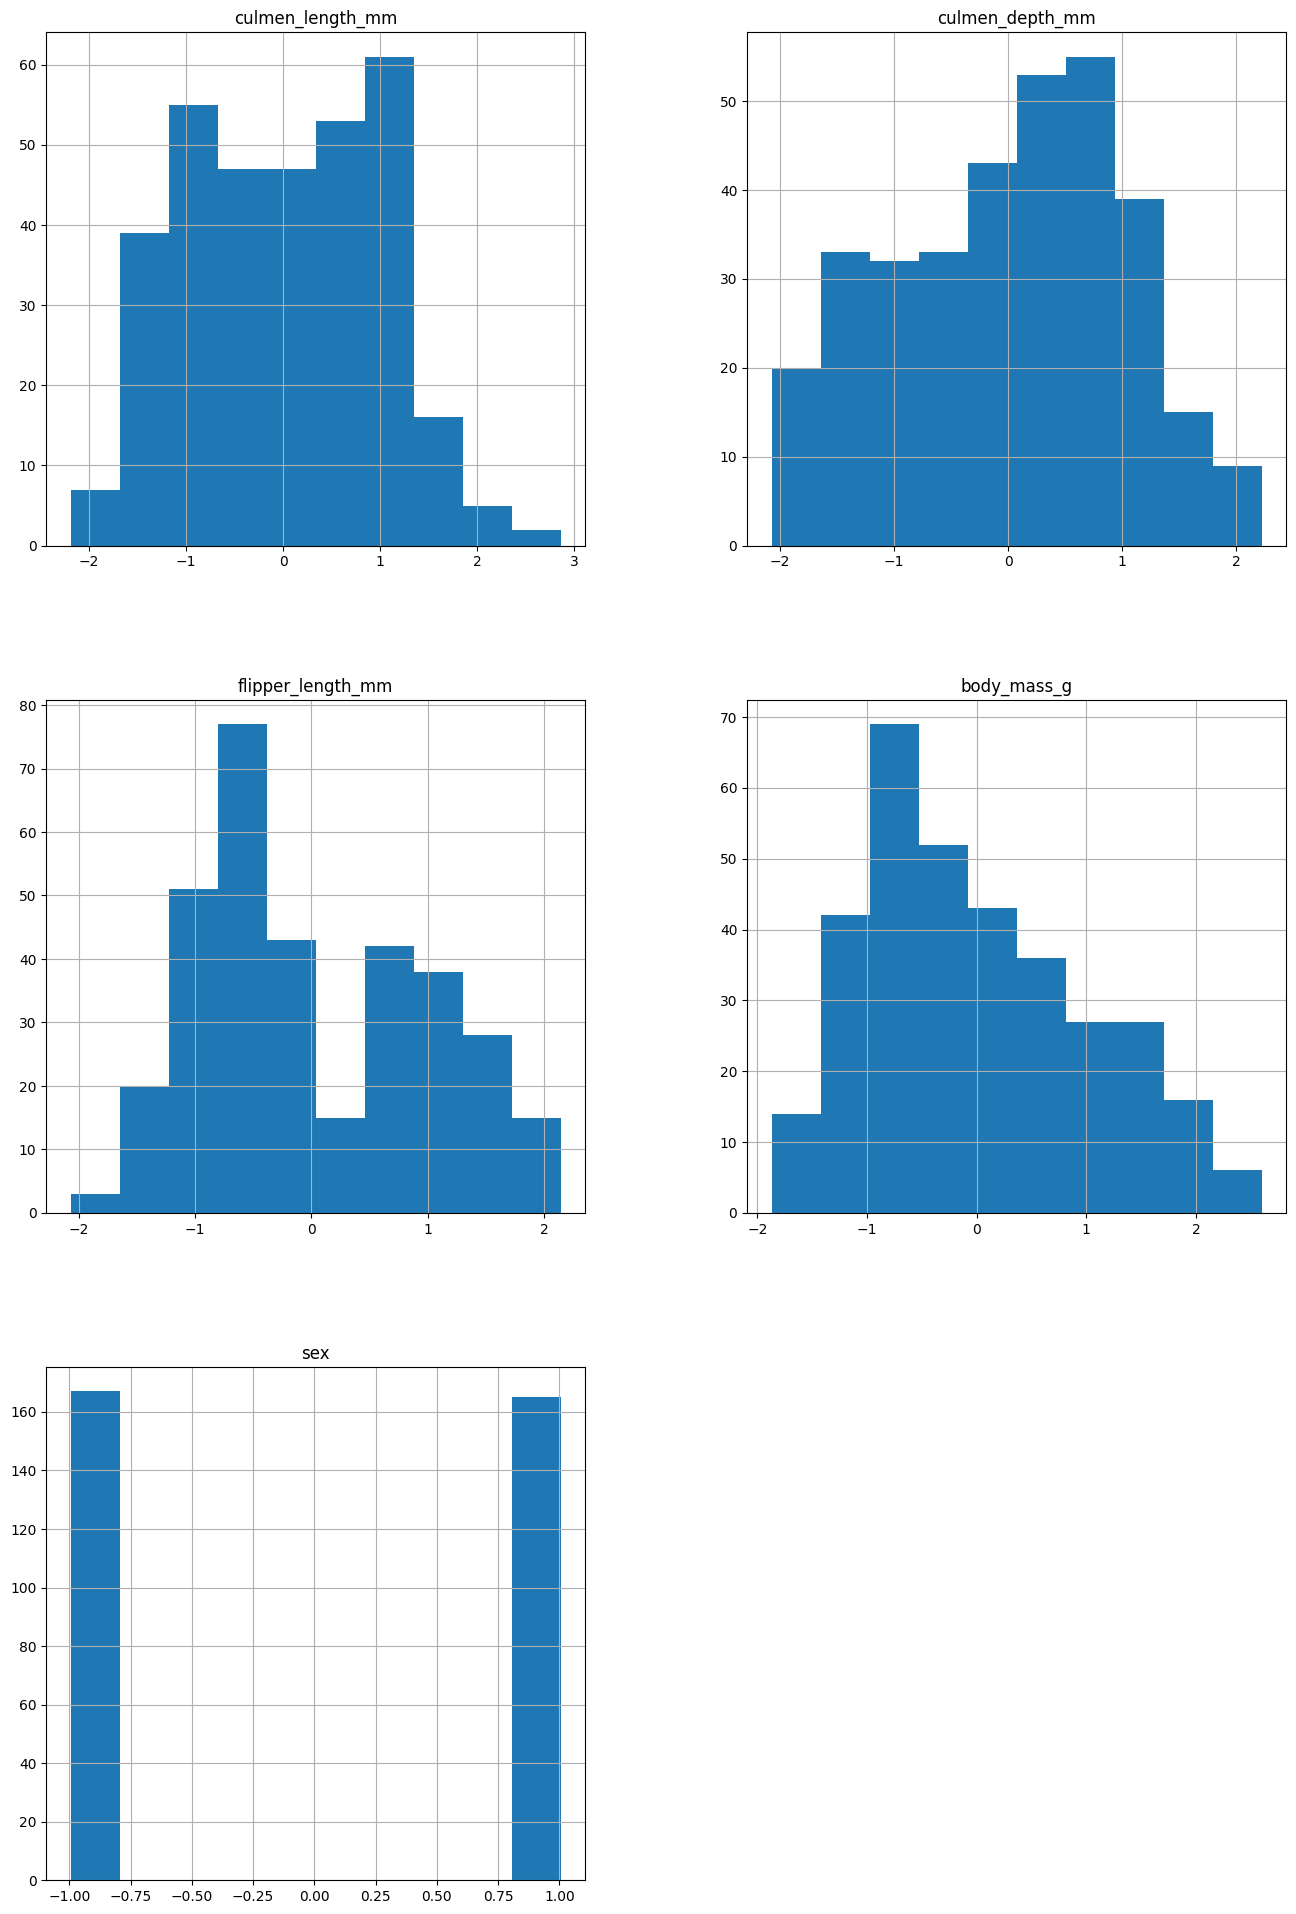

In [444]:
df.hist(bins=10, figsize=(16, 24), grid=True)
plt.show()

6

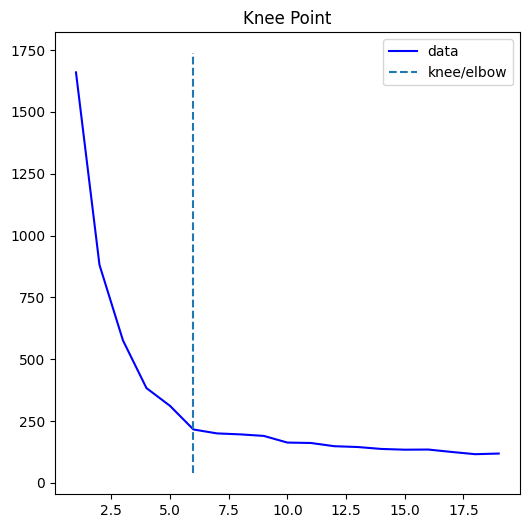

In [445]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

kneedle = KneeLocator(K, distortions, curve = "convex", direction="decreasing")

n_clusters = kneedle.knee
display(n_clusters)
kneedle.plot_knee()

In [446]:
kmeanModel = KMeans(n_clusters)
kmeanModel = kmeanModel.fit_predict(df)

Counter(kmeanModel)

Counter({2: 106, 4: 78, 1: 29, 5: 30, 0: 61, 3: 28})

DBSCAN

0.820916956536876

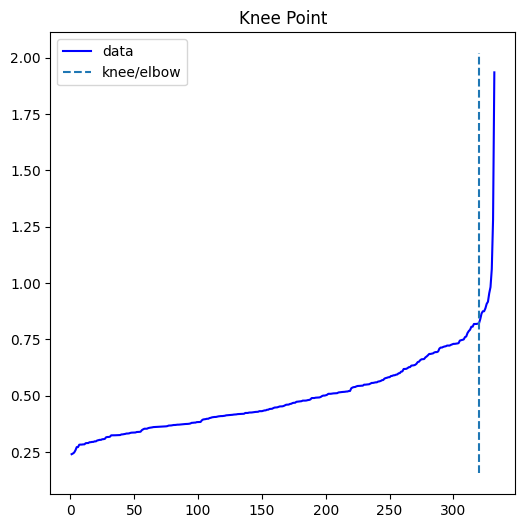

In [447]:
neighbors = NearestNeighbors(n_neighbors=4).fit(df)
neighborsDist, neighborsInd = neighbors.kneighbors(df)
sortNeighborDist = np.sort(neighborsDist, axis=0)

x = range(1, len(neighborsDist) + 1)
y = sortNeighborDist[:, 3]

kneeLocator = KneeLocator(x, y, curve="convex", S=1)
knee = kneeLocator.knee_y
display(knee)
kneeLocator.plot_knee()
plt.show()

In [448]:
clusters = DBSCAN(eps=knee, min_samples=5).fit(df)
Counter(clusters.labels_)

Counter({0: 106, 1: 104, -1: 5, 2: 58, 3: 59})

PCA

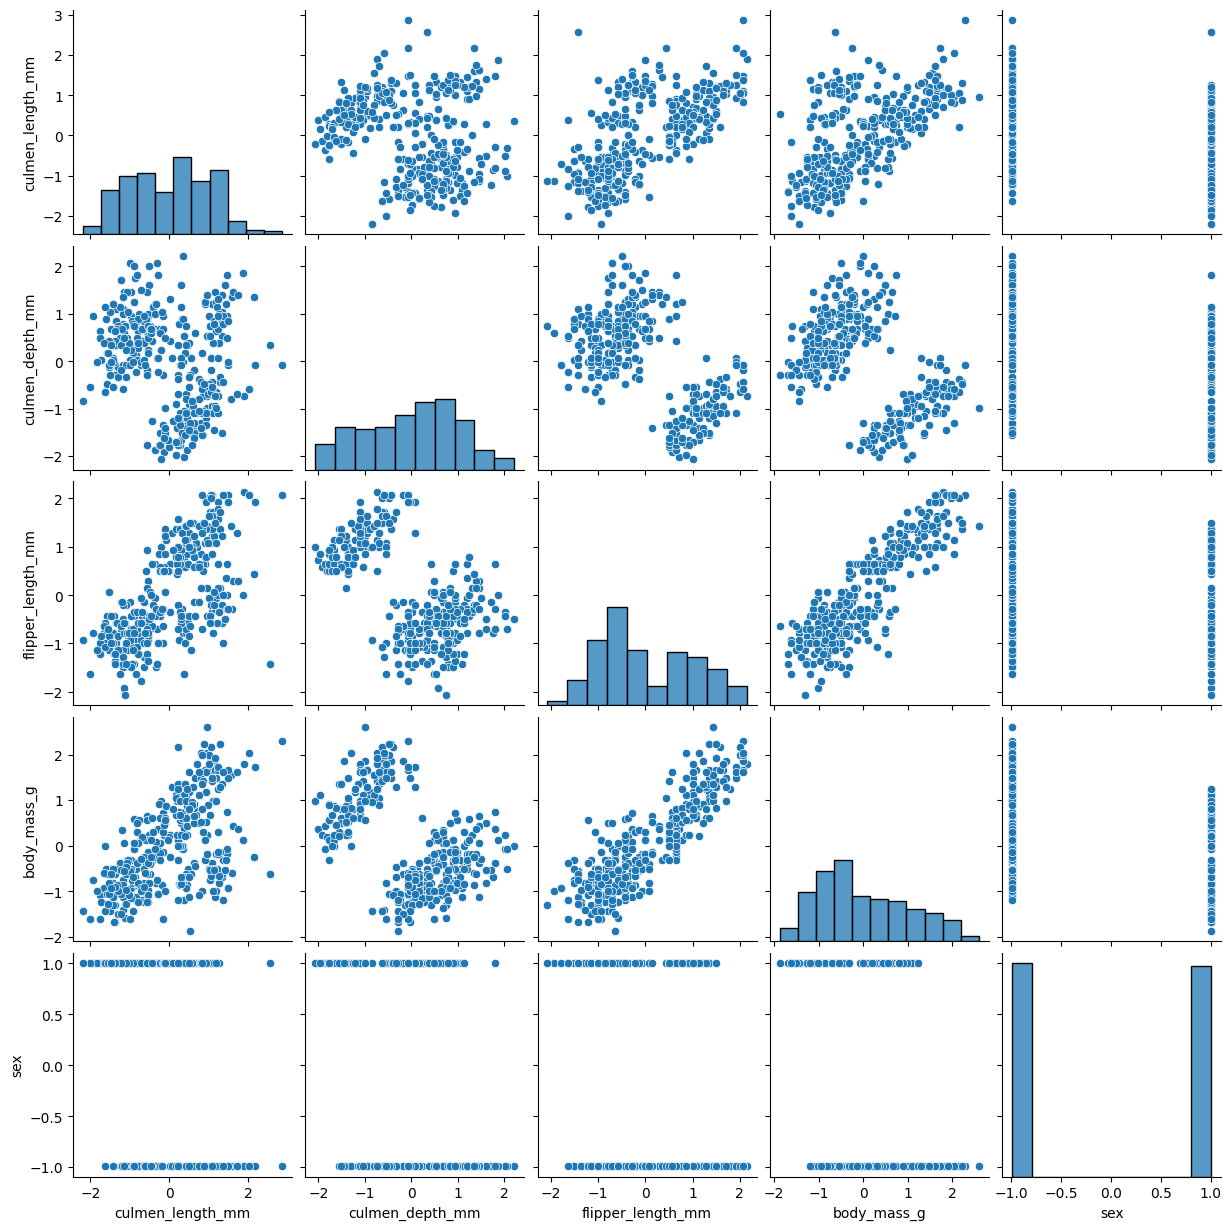

In [449]:
sns.pairplot(pd.DataFrame(df))

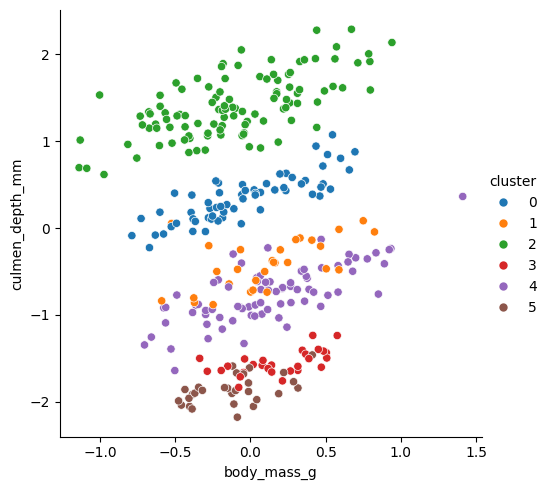

In [464]:
pcaData = PCA().fit_transform(df)
pcaDf = pd.DataFrame(data = pcaData, columns = df.columns)

pcaDf["cluster"] = kmeanModel
pcaDf["cluster"] = pcaDf["cluster"].astype("category")

sns.relplot(x="body_mass_g", y="culmen_depth_mm", hue="cluster", data=pcaDf)

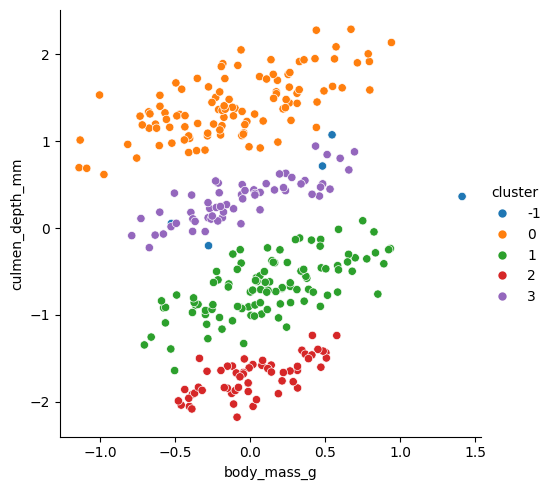

In [455]:
pcaDf["cluster"] = clusters.labels_
pcaDf["cluster"] = pcaDf["cluster"].astype("category")

sns.relplot(x="body_mass_g", y="culmen_depth_mm", hue="cluster", data=pcaDf)

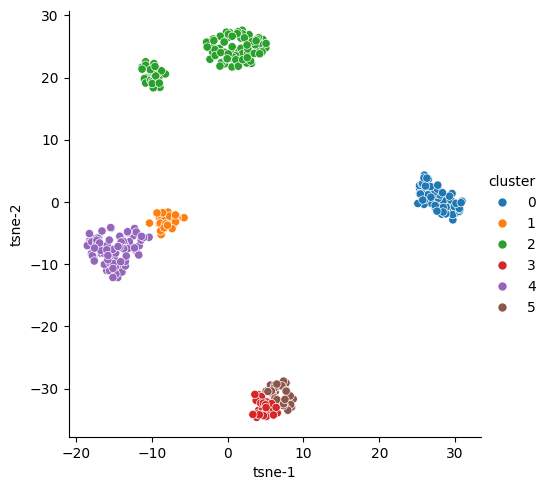

In [458]:
subsetLen = len(df)
subsetDf = df[:subsetLen]

tSNEModel = TSNE()
tSNEData = tSNEModel.fit_transform(subsetDf)

tSNEDf = pd.DataFrame()
tSNEDf['tsne-1'] = tSNEData[:, 0]
tSNEDf['tsne-2'] = tSNEData[:, 1]

tSNEDf['cluster'] = kmeanModel[: subsetLen]
tSNEDf['cluster'] = tSNEDf['cluster'].astype('category')

sns.relplot(x='tsne-1', y='tsne-2', hue="cluster", data=tSNEDf)

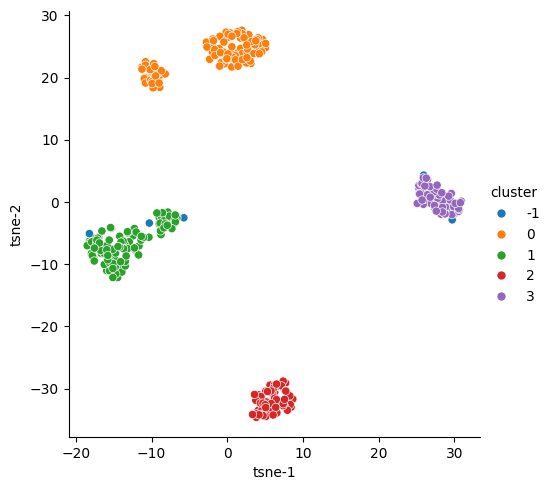

In [459]:
tSNEDf['cluster'] = clusters.labels_[:subsetLen]
tSNEDf['cluster'] = tSNEDf['cluster'].astype('category')

sns.relplot(x='tsne-1', y='tsne-2', hue="cluster", data=tSNEDf)